## 데이터 불러오기

In [ ]:
!pip install -U scikit-learn # sklearn 버전 업그레이드

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/프로젝트/combined_data (1).csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek #요일 (월 = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Div         14507 non-null  object        
 1   Date        14507 non-null  datetime64[ns]
 2   HomeTeam    14507 non-null  object        
 3   AwayTeam    14507 non-null  object        
 4   HTOa        14507 non-null  int64         
 5   ATOa        14507 non-null  int64         
 6   HTAt        14507 non-null  int64         
 7   ATAt        14507 non-null  int64         
 8   HTMid       14507 non-null  int64         
 9   ATMid       14507 non-null  int64         
 10  HTDef       14507 non-null  int64         
 11  ATDef       14507 non-null  int64         
 12  HomeSquad   14507 non-null  int64         
 13  AwaySquad   14507 non-null  int64         
 14  HomeAvgAge  14507 non-null  int64         
 15  AwayAvgAge  14507 non-null  int64         
 16  HomeMV      14507 non-

In [ ]:
df.loc[data['HR'] >= 1, 'HR'] = 1 # 레드카드의 유무로 변경 (있으면 1 / 없으면 0)
df.loc[data['AR'] >= 1, 'AR'] = 1
df

In [ ]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'HTOa', 'ATOa', 'HTAt', 'ATAt',
       'HTMid', 'ATMid', 'HTDef', 'ATDef', 'HomeSquad', 'AwaySquad',
       'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS', 'AxPTS',
       'HPPDA', 'APPDA', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'PSCH', 'PSCD', 'PSCA', 'year', 'month', 'day', 'dayofweek'],
      dtype='object')

## drop

In [ ]:
# drop할 변수

drop_col = ['Div','Date','HTOa', 'ATOa', 'FTHG', 'FTAG', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'PSCH', 'PSCD', 'PSCA', 'year', 'day', 'HTR', 'HxPTS','AxPTS','HTHG', 'HTAG']

In [ ]:
df.drop(drop_col, axis=1, inplace=True)

KeyError: "['Div', 'Date', 'HTOa', 'ATOa', 'FTHG', 'FTAG', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA', 'year', 'day', 'HTR', 'HxPTS', 'AxPTS'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HomeTeam    14507 non-null  object 
 1   AwayTeam    14507 non-null  object 
 2   HTAt        14507 non-null  int64  
 3   ATAt        14507 non-null  int64  
 4   HTMid       14507 non-null  int64  
 5   ATMid       14507 non-null  int64  
 6   HTDef       14507 non-null  int64  
 7   ATDef       14507 non-null  int64  
 8   HomeSquad   14507 non-null  int64  
 9   AwaySquad   14507 non-null  int64  
 10  HomeAvgAge  14507 non-null  int64  
 11  AwayAvgAge  14507 non-null  int64  
 12  HomeMV      14507 non-null  float64
 13  AwayMV      14507 non-null  float64
 14  FTR         14507 non-null  object 
 15  HTHG        14505 non-null  float64
 16  HTAG        14505 non-null  float64
 17  HS          14506 non-null  float64
 18  AS          14506 non-null  float64
 19  HST         14506 non-nul

## 전처리

In [ ]:
# Target 변수 수치형으로 변환

df['FTR'].replace({'H':0, 'A':1, 'D':2}, inplace=True)

In [ ]:
df['FTR'].value_counts()

FTR
0    6434
1    4429
2    3644
Name: count, dtype: int64

In [ ]:
#df['HTR'].replace({'H':0, 'A':1, 'D':2}, inplace=True)

KeyError: 'HTR'

In [ ]:
# label encoding
le = LabelEncoder()
df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
df['AwayTeam'] = le.fit_transform(df['AwayTeam'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HomeTeam    14507 non-null  int64  
 1   AwayTeam    14507 non-null  int64  
 2   HTAt        14507 non-null  int64  
 3   ATAt        14507 non-null  int64  
 4   HTMid       14507 non-null  int64  
 5   ATMid       14507 non-null  int64  
 6   HTDef       14507 non-null  int64  
 7   ATDef       14507 non-null  int64  
 8   HomeSquad   14507 non-null  int64  
 9   AwaySquad   14507 non-null  int64  
 10  HomeAvgAge  14507 non-null  int64  
 11  AwayAvgAge  14507 non-null  int64  
 12  HomeMV      14507 non-null  float64
 13  AwayMV      14507 non-null  float64
 14  FTR         14507 non-null  int64  
 15  HTHG        14505 non-null  float64
 16  HTAG        14505 non-null  float64
 17  HTR         14505 non-null  float64
 18  HS          14506 non-null  float64
 19  AS          14506 non-nul

In [ ]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTAt', 'ATAt', 'HTMid', 'ATMid', 'HTDef',
       'ATDef', 'HomeSquad', 'AwaySquad', 'HomeAvgAge', 'AwayAvgAge', 'HomeMV',
       'AwayMV', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA',
       'HxPTS', 'AxPTS', 'HPPDA', 'APPDA', 'month', 'dayofweek'],
      dtype='object')

## 피처 variance 확인

In [ ]:
X = df.drop('FTR', axis=1)
y = df['FTR']

In [ ]:
X.columns

Index(['HomeTeam', 'AwayTeam', 'HTAt', 'ATAt', 'HTMid', 'ATMid', 'HTDef',
       'ATDef', 'HomeSquad', 'AwaySquad', 'HomeAvgAge', 'AwayAvgAge', 'HomeMV',
       'AwayMV', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS',
       'AxPTS', 'HPPDA', 'APPDA', 'month', 'dayofweek'],
      dtype='object')

## 모델링

In [ ]:
# 결측치 처리

df.isna().sum()

HomeTeam      0
AwayTeam      0
HTAt          0
ATAt          0
HTMid         0
ATMid         0
HTDef         0
ATDef         0
HomeSquad     0
AwaySquad     0
HomeAvgAge    0
AwayAvgAge    0
HomeMV        0
AwayMV        0
FTR           0
HTHG          2
HTAG          2
HTR           2
HS            1
AS            1
HST           1
AST           1
HF            1
AF            1
HC            1
AC            1
HY            2
AY            1
HR            1
AR            1
HxG           0
AxG           0
HxA           3
AxA           3
HxPTS         1
AxPTS         1
HPPDA         1
APPDA         1
month         0
dayofweek     0
dtype: int64

In [ ]:
# 결측치가 존재하는 행은 전부 drop
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14502 entries, 0 to 14506
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HomeTeam    14502 non-null  int64  
 1   AwayTeam    14502 non-null  int64  
 2   HTAt        14502 non-null  int64  
 3   ATAt        14502 non-null  int64  
 4   HTMid       14502 non-null  int64  
 5   ATMid       14502 non-null  int64  
 6   HTDef       14502 non-null  int64  
 7   ATDef       14502 non-null  int64  
 8   HomeSquad   14502 non-null  int64  
 9   AwaySquad   14502 non-null  int64  
 10  HomeAvgAge  14502 non-null  int64  
 11  AwayAvgAge  14502 non-null  int64  
 12  HomeMV      14502 non-null  float64
 13  AwayMV      14502 non-null  float64
 14  FTR         14502 non-null  int64  
 15  HTHG        14502 non-null  float64
 16  HTAG        14502 non-null  float64
 17  HTR         14502 non-null  float64
 18  HS          14502 non-null  float64
 19  AS          14502 non-null  fl

In [ ]:
X = df.drop('FTR', axis=1)
y = df['FTR']

K-NN 최근접

In [ ]:
ss=StandardScaler()
ss.fit(X)

df_scaled = ss.transform(X)

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn49 = KNeighborsClassifier(n_neighbors=49) # 참고하는 이웃의 수를 49로 지정
kn49.fit(X_train, y_train)

y_pred = kn49.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = kn49.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], # 규제 유형
    'C' : np.logspace(-4, 4, 20),  # 규제 강도의 역수로 0.0001~10000을 20개로 분할
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], # 최적화에 사용할 알고리즘
    'max_iter' : [100, 1000,2500, 5000]   # 최대 반복 횟수
    }
]

In [ ]:
gs = GridSearchCV(lr, param_grid, n_jobs=-1)
gs.fit(X_train, y_train)

#pred = gs.predict(test_input)
print('최적 하이퍼파라미터: ', gs.best_params_)

In [ ]:
# 위에서 찾은 최적의 파라미터 모델
dt = gs.best_estimator_
print(dt.score(X_train, y_train))

In [ ]:
keywords = pd.DataFrame(dt.coef_, columns=columns)
keywords.T.sort_values(by=0, ascending=False) # 0을 기준으로 내림차순

In [ ]:
keywords = pd.DataFrame(dt.coef_, columns=columns)
keywords.T.sort_values(by=1, ascending=False)

다중공선성 확인

In [ ]:
# importing the variance_inflation_factor() function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# extracting the numerical columns
cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64', 'int32']]
data = df[cols]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns

# calculating VIF for each feature
vif_data['VIF']= [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

# printing the VIF of each feature
print(vif_data)

In [ ]:
# 표준화한 데이터로 다중공선성 확인

ss = StandardScaler()
ss.fit(data)
data_scaled = ss.transform(data)
data_scaled_new = pd.DataFrame(data_scaled, columns=data.columns) # numpy를 dataframe으로 변환
data_scaled_new

# VIF dataframe
vif_data_scaled = pd.DataFrame()
vif_data_scaled['Feature'] = data_scaled_new.columns

# calculating VIF for each feature
vif_data_scaled['VIF']= [variance_inflation_factor(data_scaled_new.values, i) for i in range(len(data_scaled_new.columns))]

# printing the VIF of each feature
print(vif_data_scaled)

In [ ]:
pred = lr.predict(test_scaled)
print('accuracy_score:', accuracy_score(test_target, pred))
print('f1_score:', f1_score(test_target, pred, average='micro'))

pred = dt.predict(test_scaled)
print('accuracy_score:', accuracy_score(test_target, pred))
print('f1_score:', f1_score(test_target, pred, average='micro')) # average = 'micro'일때 f1_score가 가장 크게 나온다

가지치기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

In [ ]:
dt = DecisionTreeClassifier(random_state=42,max_depth=3)
dt.fit(x_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_train, y_train))

In [ ]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

1. GradientBoosting

In [ ]:
# Gradient boosting 모델링

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

In [ ]:
# 성능지표로 f1 score 활용

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.6812701613942107


2. XGboost

In [ ]:
# XGboost 모델링

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
# 성능지표로 f1 score 활용

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.6794680907354367


3. Adaboost


In [ ]:
# Adaboost 모델링

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

In [ ]:
# f1 score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.6672031306906984


모든 피처를 넣은 모델의 f1 score 성능 점수는 다음과 같다.

Gradient Boosting: 0.6812701613942107

XGboost: 0.6794680907354367

Adaboost: 0.6672031306906984

Gradient Boosting의 f1 score 점수가 가장 높은 것을 알 수 있다.

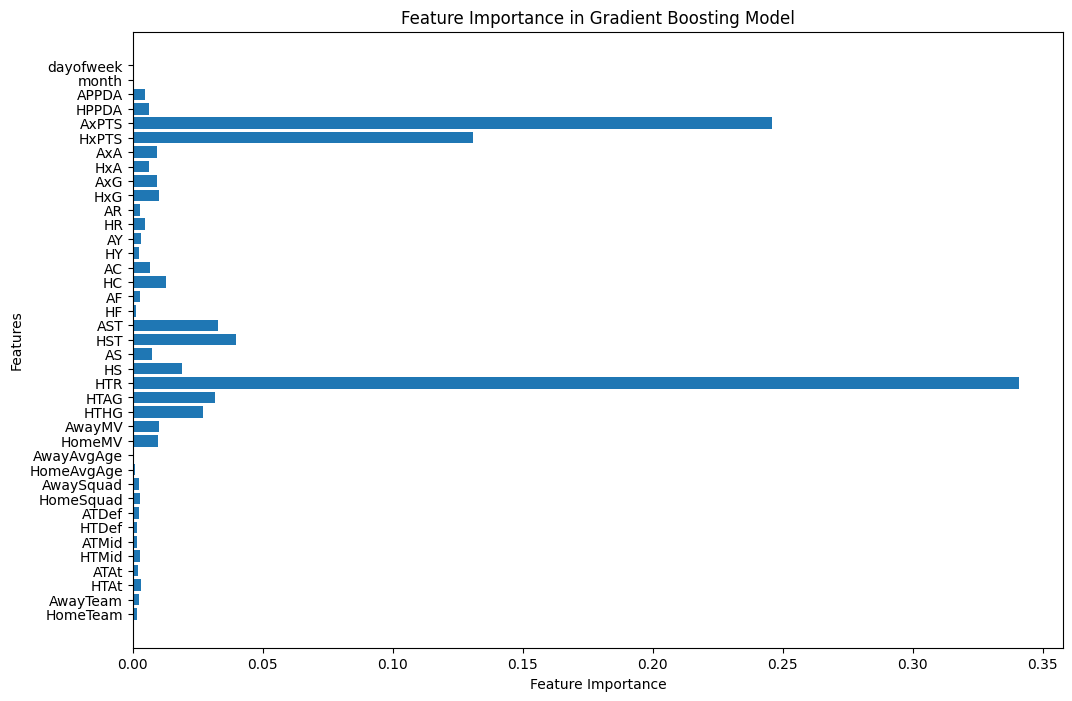

In [ ]:
# feature importance 확인

# 피처 중요도 추출
feature_importance = gb_model.feature_importances_

# 피처 중요도를 시각화
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(feature_importance)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

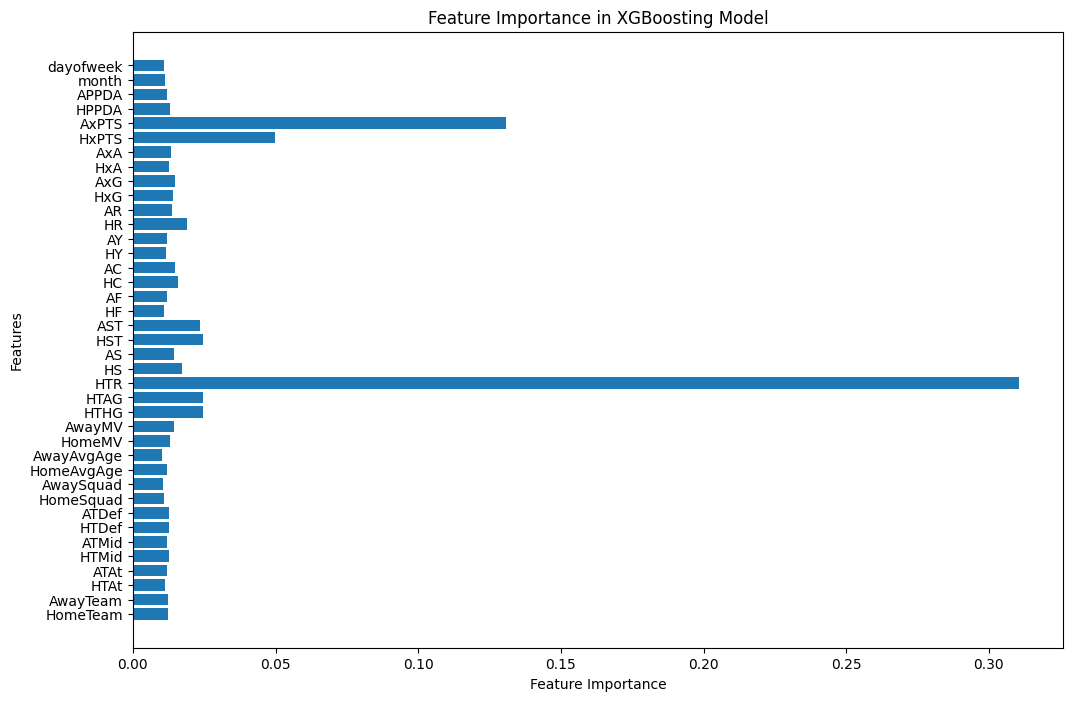

In [ ]:
# 피처 중요도 추출
feature_importance = xgb_model.feature_importances_

# 피처 중요도를 시각화
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(feature_importance)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoosting Model')
plt.show()

Gradient boosting 모델과 XGBoost 모델의 feature importance를 확인해보면 Gradient Boosting 모델에서 사용된 피처들이 중요도가 XGBoost에서보다 더 적다는 것을 알 수 있었다. 이 말인 즉슨 Gradeint boosting은 중요도 많이 떨어지는 변수는 예측에 미치는 영향이 거의 없는 반면 중요도가 상대적으로 높은 변수의 중요도는 XGBoost에서 보다 더 높다는 의미이다.